In [103]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [165]:
df = pd.read_excel("score.xlsx",encoding='utf-8')

In [134]:
import FinanceDataReader as fdr
from datetime import datetime, timedelta

def add_forward_return(ticker,day_forward):    ## 회의록 기준일로부터 day만큼 미래 수익률 컬럼 추가 함수
    df.reset_index(drop=True, inplace=True)
    df.insert(0, ticker+"+"+str(day_forward), "") 

    for i in range(len(df)):
        day = df.loc[i,"day"]
    
        end_day = day+timedelta(days=day_forward)
        price_df = fdr.DataReader(ticker, day, end_day) ### TY IXIC SPY US10YT=X VIX    
    

        df.iloc[i,0] =(price_df.iloc[-1,1]/price_df.iloc[1,1]) ## 기준일 ~ 기준일+"day" :미래 수익률 
        

def add_backward_return(ticker,day_backward):   ## 회의록 기준일로부터 day만큼 과거 수익률 컬럼 추가 함수
    df.reset_index(drop=True, inplace=True)
    df.insert(0, ticker+"-"+str(day_backward), "") 

    for i in range(len(df)):
        day = df.loc[i,"day"]
    
        start_day = day+timedelta(days=-day_backward)
        price_df = fdr.DataReader(ticker, start_day, day) 
    

        df.iloc[i,0] =(price_df.iloc[-1,1]/price_df.iloc[1,1]) ## 기준일-"day" ~ 기준일 :이전 수익률 
        
        
    ##new_df.loc[day,"60before_nasdaq"] =
    #day_list[i] = datetime.strptime(day_list[i],"%Y%m%d")
    #해당 날짜의 지수들 가져오기
    # time2 = time1 + timedelta(days=-4)
    # time3 = time1 + timedelta(days=4)
    # df = fdr.DataReader('US500', time2,time3) # S&P 500 지수
    # df2 = fdr.DataReader('IXIC', time2,time3) # 나스닥 종합지수
    # df3 = fdr.DataReader('US10YT=X',time2, time3) #미국 10년 채권 수익률

In [154]:
### 감성점수 scaling (0~1사이의 값으로)

def min_max_scaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)


df["dict_score"] = min_max_scaler(df["dict_score"]) # normalize scaling(polarity, 0~1)
df["finbert_score"] = min_max_scaler(df["finbert_score"]) # normalize scaling(subjectivity, 0~1)

In [87]:
df

,Unnamed: 0,day,dict_score,dict_subject,finbert_score,textblob_score
0,1,2018-01-31,0.743874,0.057717,0.790871,0
1,2,2018-03-21,0.606606,0.059665,0.780196,0
2,3,2018-06-13,0.472024,0.051616,0.679625,0
3,4,2018-09-26,0.652830,0.054270,0.644542,0
4,5,2018-11-08,0.423246,0.067568,0.642503,0
5,6,2018-12-19,0.340421,0.057205,0.431678,0
6,7,2019-01-30,0.322291,0.059880,0.467318,0
7,8,2019-03-20,0.417259,0.058790,0.397312,0
8,9,2019-06-19,0.210298,0.061055,0.206897,0
9,10,2019-07-31,0.195433,0.066194,0.549247,0


No handles with labels found to put in legend.


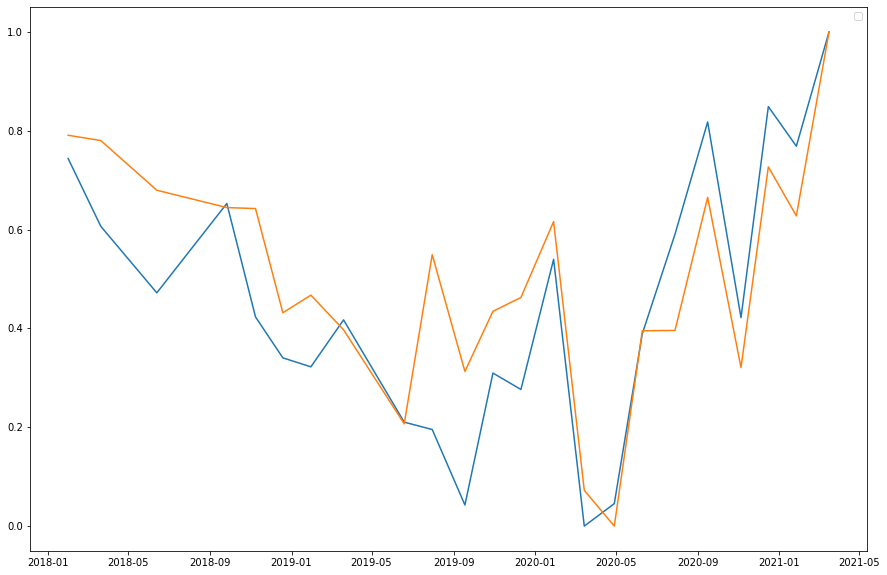

In [88]:
plt.figure(figsize=(15,10))
plt.plot(df["day"],df["dict_score"])
plt.plot(df["day"],df["finbert_score"])
plt.legend()


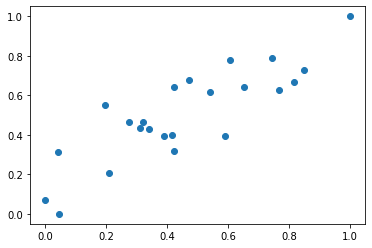

In [18]:
plt.scatter(df["dict_score"],df["finbert_score"])

In [98]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.nonparametric.smoothers_lowess import lowess
import scipy.stats as stats

In [100]:
base_lr = sm.OLS(df["dict_score"], df["finbert_score"]) # 선형회귀 모델 생성
results = base_lr.fit() # 학습데이터로 모델 학습 
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:             dict_score   R-squared (uncentered):                   0.927
Model:                            OLS   Adj. R-squared (uncentered):              0.924
Method:                 Least Squares   F-statistic:                              278.8
Date:                Fri, 28 May 2021   Prob (F-statistic):                    5.58e-14
Time:                        03:27:12   Log-Likelihood:                          12.238
No. Observations:                  23   AIC:                                     -22.48
Df Residuals:                      22   BIC:                                     -21.34
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [89]:
add_forward_return("IXIC",60)

In [91]:
df["IXIC+60"] = min_max_scaler(df["IXIC+60"]) # normalize scaling(polarity, 0~1)

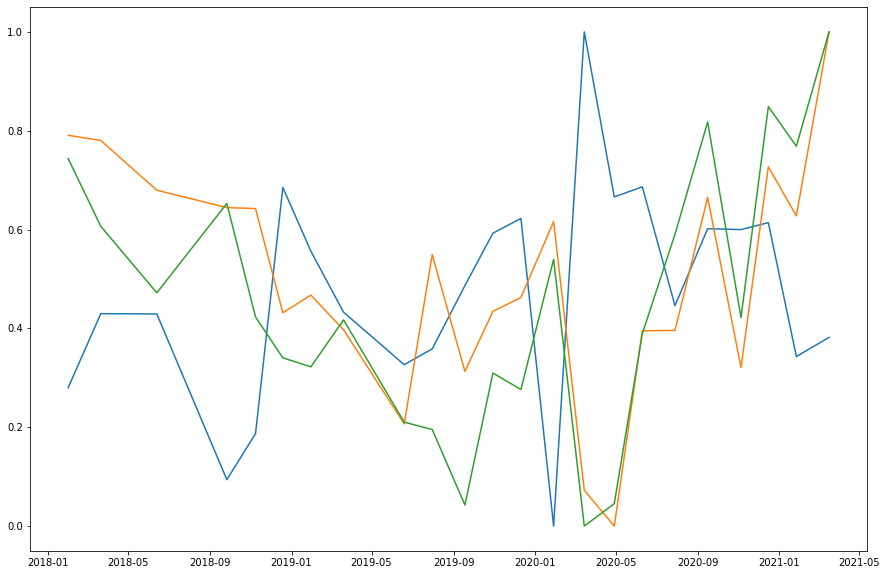

In [92]:
plt.figure(figsize=(15,10))

plt.plot(df["day"],df["IXIC+60"]) ## IXIC: NASDAQ
plt.plot(df["day"],df["finbert_score"])
plt.plot(df["day"],df["dict_score"])

In [93]:
add_forward_return("IXIC",90)

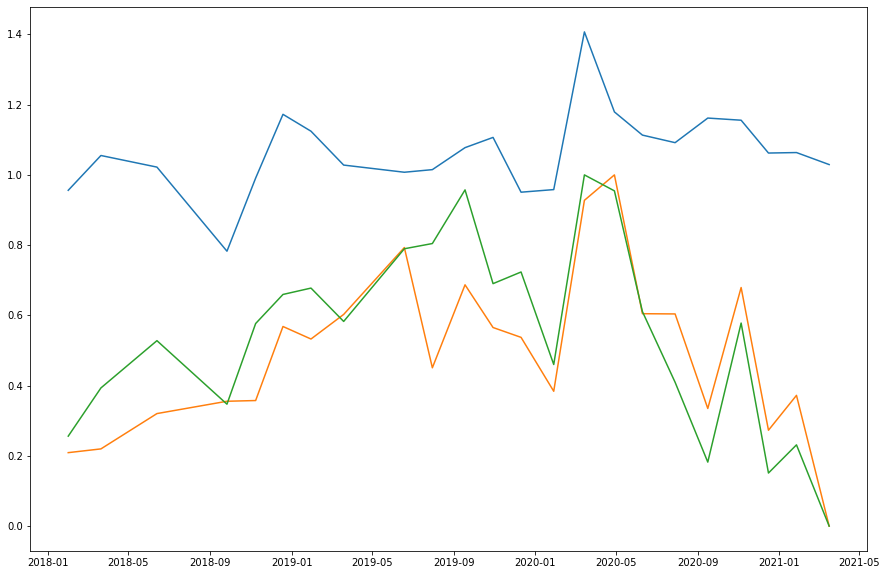

In [95]:
plt.figure(figsize=(15,10))


plt.plot(df["day"],df["IXIC+90"]) ## IXIC: NASDAQ
plt.plot(df["day"],1-df["finbert_score"])
plt.plot(df["day"],1-df["dict_score"])

In [109]:
df["IXIC+90"]= min_max_scaler(df["IXIC+90"])

In [128]:
df

,IXIC+90,IXIC+60,Unnamed: 0,day,dict_score,dict_subject,finbert_score,textblob_score
0,0.277712,0.279839,1,2018-01-31,0.743874,0.057717,0.790871,0
1,0.436412,0.429888,2,2018-03-21,0.606606,0.059665,0.780196,0
2,0.383471,0.429183,3,2018-06-13,0.472024,0.051616,0.679625,0
3,0,0.0939589,4,2018-09-26,0.652830,0.054270,0.644542,0
4,0.333347,0.187077,5,2018-11-08,0.423246,0.067568,0.642503,0
5,0.624149,0.685174,6,2018-12-19,0.340421,0.057205,0.431678,0
6,0.547176,0.556304,7,2019-01-30,0.322291,0.059880,0.467318,0
7,0.392743,0.432818,8,2019-03-20,0.417259,0.058790,0.397312,0
8,0.360062,0.326607,9,2019-06-19,0.210298,0.061055,0.206897,0
9,0.371952,0.358691,10,2019-07-31,0.195433,0.066194,0.549247,0


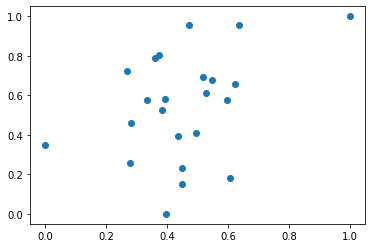

In [130]:
plt.scatter(df["IXIC+90"], 1-df["dict_score"])

In [125]:
base_lr = sm.OLS(df["IXIC+90"], df["finbert_score"]) # 선형회귀 모델 생성
results = base_lr.fit() # 학습데이터로 모델 학습 
print(results.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [166]:
add_backward_return("US10YT=X",90)

In [292]:
add_forward_return("IXIC",100)

In [248]:
df

,IXIC+150,IXIC+120,IXIC+10,SPY+2,SPY+1,SPY+3,SPY+20,SPY+120,SPY+90,IXIC+90,US10YT=X-90,Unnamed: 0,day,dict_score,dict_subject,finbert_score,textblob_score
0,0.17102,0.196245,0,0.531057,1,0.665453,0.155439,0.201517,0.26608,0.277712,0.578263,1,2018-01-31,-0.153203,0.057717,0.790871,0
1,0.246397,0.297151,0.2218,0.230091,1,0.450743,0.34305,0.38549,0.459101,0.436412,0.582245,2,2018-03-21,-0.213873,0.059665,0.780196,0
2,0.087575,0.11628,0.49651,0.383556,1,0.560225,0.258015,0.26004,0.475733,0.383471,0.497524,3,2018-06-13,-0.273356,0.051616,0.679625,0
3,0.0362164,0,0.355666,0.590918,1,0.708159,0,0.0554972,0,0,0.528126,4,2018-09-26,-0.193443,0.054270,0.644542,0
4,0.226628,0.153954,0.227288,0.63262,1,0.737909,0.138948,0.224886,0.355388,0.333347,0.55627,5,2018-11-08,-0.294915,0.067568,0.642503,0
5,0.414217,0.491823,0.491488,0.272562,1,0.481042,0.761599,0.65611,0.716559,0.624149,0.40601,6,2018-12-19,-0.331522,0.057205,0.431678,0
6,0.299463,0.25384,0.505198,0.917183,1,0.940918,0.818923,0.378601,0.630181,0.547176,0.366172,7,2019-01-30,-0.339535,0.059880,0.467318,0
7,0.161004,0.266201,0.501143,0.897705,1,0.927022,0.735062,0.415409,0.494919,0.392743,0.416288,8,2019-03-20,-0.297561,0.058790,0.397312,0
8,0.218112,0.196885,0.397579,0.446584,1,0.60519,0.463212,0.305344,0.437119,0.360062,0.328478,9,2019-06-19,-0.389034,0.061055,0.206897,0
9,0.294325,0.267031,0.318642,0.269281,1,0.4787,0.282418,0.411129,0.448553,0.371952,0.325672,10,2019-07-31,-0.395604,0.066194,0.549247,0


In [178]:
### Feature scaling

df["US10YT=X-90"]= min_max_scaler(df["US10YT=X-90"])
df["finbert_score"]= min_max_scaler(df["finbert_score"])

In [307]:
# (Y= 회의록 기준일 긍정적 감성점수,finbert_score X=회의록 기준일 90일전~ 미국채 10년물 금리) 선형회귀 모델 생성
base_lr = sm.OLS((df["finbert_score"]).astype(float),(df["US10YT=X-90"]).astype(float))
results = base_lr.fit()
print(results.summary()) 

## R-squared score : 0.937
## 미국채 10년물 금리는 회의록 발표일 90일전을 기준으로 상승한만큼(채권가격은 하락한 만큼) 회의록에는 긍정적인 경제판단

                                 OLS Regression Results                                
Dep. Variable:          finbert_score   R-squared (uncentered):                   0.937
Model:                            OLS   Adj. R-squared (uncentered):              0.934
Method:                 Least Squares   F-statistic:                              327.3
Date:                Fri, 28 May 2021   Prob (F-statistic):                    1.07e-14
Time:                        15:12:31   Log-Likelihood:                          12.682
No. Observations:                  23   AIC:                                     -23.36
Df Residuals:                      22   BIC:                                     -22.23
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

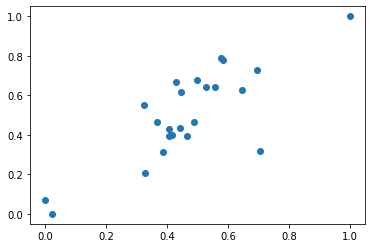

In [308]:
plt.scatter(df["US10YT=X-90"],df["finbert_score"])
# (Y= 회의록 기준일 긍정적 감성점수,finbert_score X=회의록 기준일 90일전~ 미국채 10년물 금리) 산점도

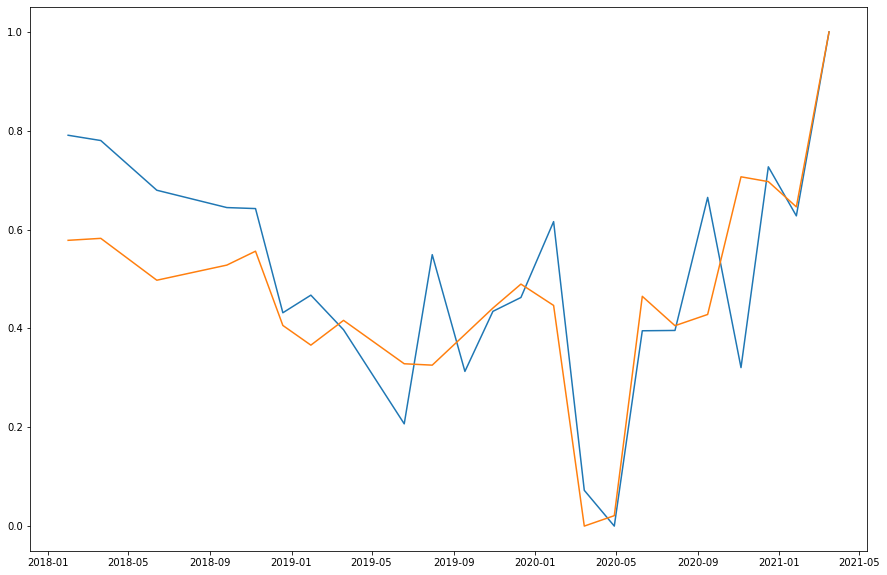

In [274]:
plt.figure(figsize=(15,10))


plt.plot(df["day"],df["finbert_score"])
plt.plot(df["day"],df["US10YT=X-90"])

## 파란색 : 긍정적 감정 score(finbert)
## 주황색 : 90일 이전 ~ 회의록 발표일 미국채 10년물 금리의 변화
## 결과 : 회의록 90일 이전부터 미국채 10년물 금리가 하락한만큼(채권 가격이 상승한 만큼)
##       회의록의 긍정적 setiment score도 하락한다

In [309]:
# (Y=회의록 기준일 90일후~ 나스닥 주가지수, X= 회의록 기준일 부정적 감성점수,finbert_score ) 선형회귀 모델 생성
base_lr = sm.OLS((df["IXIC+90"]).astype(float), (1-df["finbert_score"]).astype(float) )
results = base_lr.fit()
print(results.summary())

## R-squared score : 0.857
## 회의록의 부정적인 경제판단이 높을수록 회의록 발표일 90일 후를 기준으로 오히려 나스닥 주가지수는 상승 

                                 OLS Regression Results                                
Dep. Variable:                IXIC+90   R-squared (uncentered):                   0.857
Model:                            OLS   Adj. R-squared (uncentered):              0.851
Method:                 Least Squares   F-statistic:                              132.3
Date:                Fri, 28 May 2021   Prob (F-statistic):                    8.90e-11
Time:                        15:22:05   Log-Likelihood:                          6.2355
No. Observations:                  23   AIC:                                     -10.47
Df Residuals:                      22   BIC:                                     -9.336
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [294]:
df["IXIC+100"]= min_max_scaler(df["IXIC+100"])
df["finbert_score"]= min_max_scaler(df["finbert_score"])

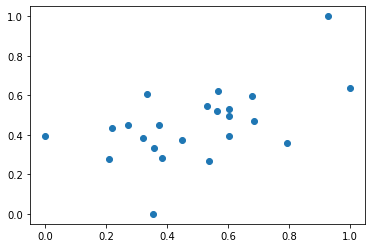

In [310]:
plt.scatter(1-df["finbert_score"] ,df["IXIC+90"])
# (Y=회의록 기준일 90일후~ 나스닥 주가지수, X= 회의록 기준일 부정적 감성점수,finbert_score ) 산점도

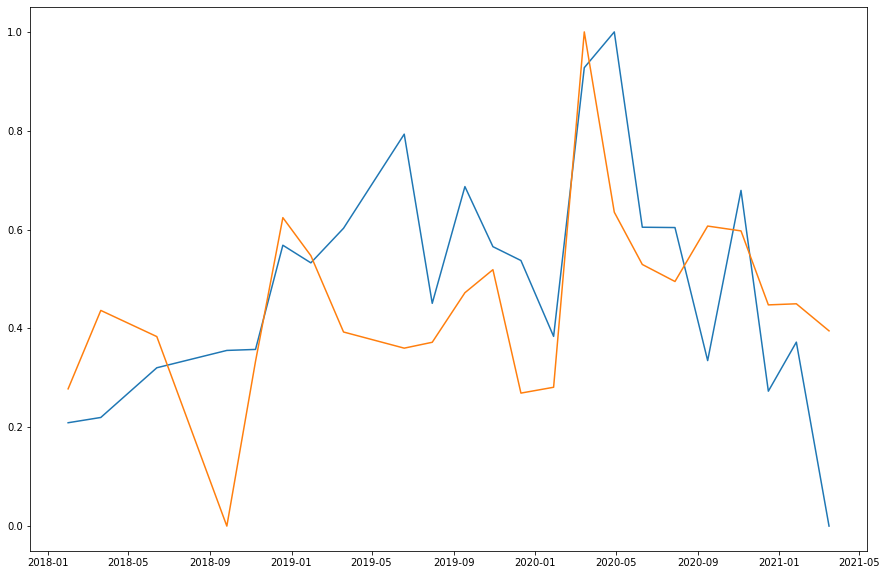

In [300]:
plt.figure(figsize=(15,10))


plt.plot(df["day"],1-df["finbert_score"])
plt.plot(df["day"],df["IXIC+90"])


## 파란색 : 부정적 감정 score(finbert)
## 주황색 : 회의록 발표 이후 90일간 나스닥 주가지수 수익률
## 결과 : 회의록의 부정적 setiment score가 높을수록 주가지수의 기대 수익률은 오히려 높다